<a href="https://colab.research.google.com/github/jashanmeet-collab/ML-Optimizers/blob/main/LinearRegression/Classifier_SyntheticDataset_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# More complex synthetic datasets

In [1]:
# Linear Regression Class

# Useful import
import numpy as np
from numpy.linalg import inv
from sklearn.linear_model import LinearRegression


In [2]:
import random 

#making some fake data
num_points = 100

random_range = 500
intercept = 4
slope = 3

intercept_expected = intercept+ random_range/2.0 


def createData(num_points):
  X = []
  Y = []

  for i in range(num_points):
    X.append(i)
    y = slope*i*i + slope*i + intercept + random.random()*random_range
    Y.append(y)
  
  return X, Y


# def createData_new(num_points):
#   X = []
#   Y = []

#   for i in range(num_points):
#     X.append(i)
#     y = (slope+1)*i*i + slope*i + intercept + random.random()*random_range*i
#     Y.append(y)
  
#   return X, Y

In [3]:
# create training data 

X_train, Y_train =  createData(num_points)

In [4]:
# create test data

X_test, Y_test =  createData(num_points)

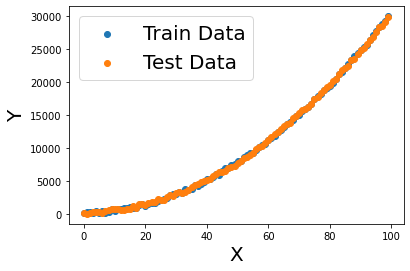

In [5]:
# visualize the train and test data

from matplotlib import pyplot as plt
plt.scatter(X_train,Y_train, label = 'Train Data')
plt.scatter(X_test, Y_test, label = 'Test Data')
plt.legend(fontsize = 20)
plt.xlabel('X', fontsize = 20)
plt.ylabel('Y', fontsize = 20)
plt.show()


In [6]:
# training a linear classifier
X_train_input = np.array(X_train)
X_train_input = X_train_input.reshape(X_train_input.shape[0], 1)
reg = LinearRegression().fit(X_train_input, Y_train)

In [7]:
# testing a linear classifier
X_test_input = np.array(X_test)
X_test_input = X_test_input.reshape(X_test_input.shape[0], 1)
Y_predict = reg.predict(X_test_input)

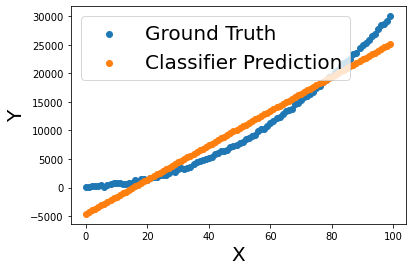

In [8]:
# See the predict

from matplotlib import pyplot as plt
plt.scatter(X_test,Y_test, label = 'Ground Truth')
plt.scatter(X_test, Y_predict, label = 'Classifier Prediction')
plt.legend(fontsize = 20)
plt.xlabel('X', fontsize = 20)
plt.ylabel('Y', fontsize = 20)
plt.show()


In [9]:
# Mean square error and Coefficient of regression for single power of x
from sklearn.metrics import mean_squared_error
Y_true=Y_train
mean_squared_error(Y_true,Y_predict)
# MSE = np.square(np.subtract(Y_true,Y_predict)).mean()
# print(MSE)

5059808.623535511

In [10]:
print("Maximum value of true data is:",max(Y_train))

Maximum value of true data is: 30031.684646334517


In [11]:
print("Minimum value of true data is:",min(Y_train))

Minimum value of true data is: 104.4666998769509


In [12]:
print("Maximum value of predicted data is:",max(Y_predict))

Maximum value of predicted data is: 25138.34053887514


In [13]:
print("Minimum value of predicted data is:",min(Y_predict))

Minimum value of predicted data is: -4620.26724295979


In [14]:
from sklearn.metrics import r2_score
r2_score(Y_true, Y_predict)

0.9370267743772243

In [15]:
# Making features with higher power of X


# training a quadratic classifier
X_train_input = []
for x in X_train:
  X_train_input.append([x, x*x])

X_train_input = np.array(X_train_input)
reg = LinearRegression().fit(X_train_input, Y_train)

In [16]:
# prediction
X_test_input = []
for x in X_test:
  X_test_input.append([x, x*x])

X_test_input = np.array(X_test_input)
print(X_test_input.shape)
Y_predict2 = reg.predict(X_test_input)
print(Y_predict2.shape)

(100, 2)
(100,)


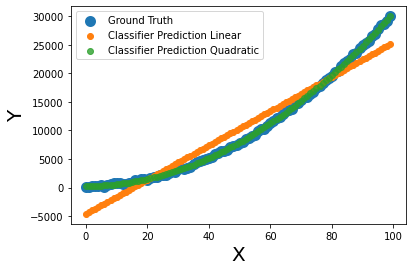

In [17]:
# See the predict

from matplotlib import pyplot as plt
plt.scatter(X_test,Y_test, label = 'Ground Truth',linewidth=5)
plt.scatter(X_test, Y_predict, label = 'Classifier Prediction Linear')
plt.scatter(X_test, Y_predict2, label = 'Classifier Prediction Quadratic',alpha=0.8)

plt.legend(fontsize = 10)
plt.xlabel('X', fontsize = 20)
plt.ylabel('Y', fontsize = 20)
plt.show()


In [18]:
#Mean square error and Coefficient of regression for double power of x
from sklearn.metrics import mean_squared_error
Y_true=Y_train
mean_squared_error(Y_true,Y_predict2)


19782.956740105936

In [19]:
print("Maximum value of true data is:",max(Y_train))

Maximum value of true data is: 30031.684646334517


In [20]:
print("Minimum value of true data is:",min(Y_train))

Minimum value of true data is: 104.4666998769509


In [21]:
print("Maximum value of true data is:",max(Y_predict2))

Maximum value of true data is: 30009.93624051953


In [22]:
print("Minimum value of true data is:",min(Y_predict2))

Minimum value of true data is: 251.32845868460208


In [23]:
from sklearn.metrics import r2_score
r2_score(Y_true, Y_predict2)

0.9997537858265062

# Many powers of x

In [24]:
def transformX(X_input, degree = 5):
  X_transformed = []

  for x in X_input:
    elem = []
    for i in range(1, degree+1):
      elem.append(x**i)

    X_transformed.append(elem) # elem = [x, x*x, x*x*x, ..., x*x*x*x*x]
  
  return X_transformed

In [25]:
X_train_input  = transformX(X_train, 20)

In [26]:
X_train_input = np.array(X_train_input)
X_train_input.shape

(100, 20)

In [27]:
reg = LinearRegression().fit(X_train_input, Y_train)

In [28]:
y_train_predict = reg.predict(X_train_input)

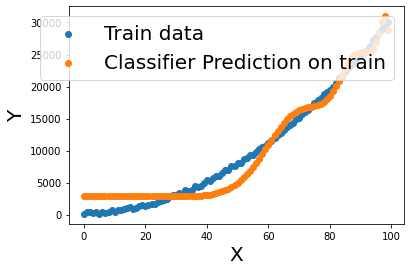

In [29]:
# See the training predict

from matplotlib import pyplot as plt
plt.scatter(X_train,Y_train, label = 'Train data')
plt.scatter(X_train, y_train_predict, label = 'Classifier Prediction on train')
plt.legend(fontsize = 20)
plt.xlabel('X', fontsize = 20)
plt.ylabel('Y', fontsize = 20)
plt.show()


In [30]:
# See the test prediction

X_test_input  = transformX(X_test, 20)
X_test_input= np.array(X_test_input)

y_test_predict = reg.predict(X_test_input)

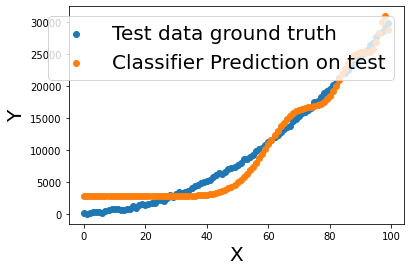

In [31]:
# See the test prediction

from matplotlib import pyplot as plt
plt.scatter(X_test,Y_test, label = 'Test data ground truth')
plt.scatter(X_test, y_test_predict, label = 'Classifier Prediction on test')
plt.legend(fontsize = 20)
plt.xlabel('X', fontsize = 20)
plt.ylabel('Y', fontsize = 20)
plt.show()